### Transformer

### Import Library

In [91]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import torchvision 
from torchvision import datasets 
import random

### Set Random Seed

In [92]:
seed = 1234 
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

### Dataset Preparation

In [93]:
import os 
train_video_dir = "C:/Users/araya/Desktop/vscode/Deep-Learning-Coding/MediaPipe/Data for Different actions/train"
validate_video_dir = "C:/Users/araya/Desktop/vscode/Deep-Learning-Coding/MediaPipe/Data for Different actions/validate"
test_video_dir = "C:/Users/araya/Desktop/vscode/Deep-Learning-Coding/MediaPipe/Data for Different actions/test"
train_video_list = []
validate_video_list = []
test_video_list = []
train_video_list = os.listdir(train_video_dir)
validate_video_list = os.listdir(validate_video_dir)
test_video_list = os.listdir(test_video_dir)

print("Number of train_video_list : ", len(train_video_list))
print("List of train_video_list : ", train_video_list)
print("Number of validate_video_list : ", len(validate_video_list))
print("List of validate_video_list : ", validate_video_list)
print("Number of test_video_list : ", len(test_video_list))
print("List of test_video_list : ", test_video_list)

Number of train_video_list :  64
List of train_video_list :  ['ขยัน.mp4', 'ขยัน_0.mp4', 'ขอบคุณ.mp4', 'ขอบคุณ_0.mp4', 'ขอโทษ.mp4', 'ขอโทษ_0.mp4', 'ขี้เกียจ.mp4', 'ขี้เกียจ_0.mp4', 'ขโมย.mp4', 'ขโมย_0.mp4', 'คิดถึง.mp4', 'คิดถึง_0.mp4', 'คุณ พรุ่งนี้อย่าลืมส่งการบ้านคณิตศาสตร์ให้ครู.mp4', 'คุณ.mp4', 'คุณ_0.mp4', 'คุณช่วยแปลภาษาอังกฤษเป็นภาษาไทยให้ฉันด้วย.mp4', 'คุณช่วยแปลภาษาอังกฤษเป็นภาษาไทยให้ฉันด้วย_0.mp4', 'คุณพรุ่งนี้อย่าลืมส่งการบ้านคณิตศาสตร์ให้ครู_0.mp4', 'ฉัน.mp4', 'ฉัน_0.mp4', 'ฉันตื่นนอน 6 โมงเช้าทุกวัน.mp4', 'ฉันตื่นนอน6โมงเช้าทุกวัน_0.mp4', 'ฉันฝึกเขียนภาษาไทยจนเขียนได้ดีขึ้น.mp4', 'ฉันฝึกเขียนภาษาไทยจนเขียนได้ดีขึ้น_0.mp4', 'ชอบ.mp4', 'ชอบ_0.mp4', 'ดีใจ.mp4', 'ดีใจ_0.mp4', 'น่ารัก.mp4', 'น่ารัก_0.mp4', 'น้อง.mp4', 'น้อง_0.mp4', 'บ้าน.mp4', 'บ้าน_0.mp4', 'ภาษาอังกฤษเป็นเรื่องยากสำหรับคนหูหนวก.mp4', 'ภาษาอังกฤษเป็นเรื่องยากสำหรับคนหูหนวก_0.mp4', 'รถยนต์.mp4', 'รถยนต์_0.mp4', 'รัก.mp4', 'รัก_0.mp4', 'ลาก่อน.mp4', 'ลาก่อน_0.mp4', 'วิชาคณิตศาสตร์เป็นวิชาที่เรียนยากมาก.mp4', 'วิ

In [94]:
train_actions = np.array(train_video_list)
print(train_actions)
validate_actions = np.array(validate_video_list)
print(validate_actions)
test_actions = np.array(test_video_list)
print(test_actions)

['ขยัน.mp4' 'ขยัน_0.mp4' 'ขอบคุณ.mp4' 'ขอบคุณ_0.mp4' 'ขอโทษ.mp4'
 'ขอโทษ_0.mp4' 'ขี้เกียจ.mp4' 'ขี้เกียจ_0.mp4' 'ขโมย.mp4' 'ขโมย_0.mp4'
 'คิดถึง.mp4' 'คิดถึง_0.mp4'
 'คุณ พรุ่งนี้อย่าลืมส่งการบ้านคณิตศาสตร์ให้ครู.mp4' 'คุณ.mp4' 'คุณ_0.mp4'
 'คุณช่วยแปลภาษาอังกฤษเป็นภาษาไทยให้ฉันด้วย.mp4'
 'คุณช่วยแปลภาษาอังกฤษเป็นภาษาไทยให้ฉันด้วย_0.mp4'
 'คุณพรุ่งนี้อย่าลืมส่งการบ้านคณิตศาสตร์ให้ครู_0.mp4' 'ฉัน.mp4'
 'ฉัน_0.mp4' 'ฉันตื่นนอน 6 โมงเช้าทุกวัน.mp4'
 'ฉันตื่นนอน6โมงเช้าทุกวัน_0.mp4' 'ฉันฝึกเขียนภาษาไทยจนเขียนได้ดีขึ้น.mp4'
 'ฉันฝึกเขียนภาษาไทยจนเขียนได้ดีขึ้น_0.mp4' 'ชอบ.mp4' 'ชอบ_0.mp4'
 'ดีใจ.mp4' 'ดีใจ_0.mp4' 'น่ารัก.mp4' 'น่ารัก_0.mp4' 'น้อง.mp4'
 'น้อง_0.mp4' 'บ้าน.mp4' 'บ้าน_0.mp4'
 'ภาษาอังกฤษเป็นเรื่องยากสำหรับคนหูหนวก.mp4'
 'ภาษาอังกฤษเป็นเรื่องยากสำหรับคนหูหนวก_0.mp4' 'รถยนต์.mp4' 'รถยนต์_0.mp4'
 'รัก.mp4' 'รัก_0.mp4' 'ลาก่อน.mp4' 'ลาก่อน_0.mp4'
 'วิชาคณิตศาสตร์เป็นวิชาที่เรียนยากมาก.mp4'
 'วิชาคณิตศาสตร์เป็นวิชาที่เรียนยากมาก_0.mp4' 'สบายดี.mp4' 'สบายดี_0.mp4'
 'สวัสดี.mp4' 'สวั

In [95]:
train_file_paths = []
for action in train_actions:
    video_path = os.path.join('Data for different actions/train/', action)
    # print(video_path)
    # print(action)
    train_file_paths.append(video_path + '/' + action.split(".")[0] + ".npy")
print(train_file_paths)

['Data for different actions/train/ขยัน.mp4/ขยัน.npy', 'Data for different actions/train/ขยัน_0.mp4/ขยัน_0.npy', 'Data for different actions/train/ขอบคุณ.mp4/ขอบคุณ.npy', 'Data for different actions/train/ขอบคุณ_0.mp4/ขอบคุณ_0.npy', 'Data for different actions/train/ขอโทษ.mp4/ขอโทษ.npy', 'Data for different actions/train/ขอโทษ_0.mp4/ขอโทษ_0.npy', 'Data for different actions/train/ขี้เกียจ.mp4/ขี้เกียจ.npy', 'Data for different actions/train/ขี้เกียจ_0.mp4/ขี้เกียจ_0.npy', 'Data for different actions/train/ขโมย.mp4/ขโมย.npy', 'Data for different actions/train/ขโมย_0.mp4/ขโมย_0.npy', 'Data for different actions/train/คิดถึง.mp4/คิดถึง.npy', 'Data for different actions/train/คิดถึง_0.mp4/คิดถึง_0.npy', 'Data for different actions/train/คุณ พรุ่งนี้อย่าลืมส่งการบ้านคณิตศาสตร์ให้ครู.mp4/คุณ พรุ่งนี้อย่าลืมส่งการบ้านคณิตศาสตร์ให้ครู.npy', 'Data for different actions/train/คุณ.mp4/คุณ.npy', 'Data for different actions/train/คุณ_0.mp4/คุณ_0.npy', 'Data for different actions/train/คุณช่วยแปลภาษ

In [96]:
validate_file_paths = []
for action in validate_actions:
    video_path = os.path.join('Data for different actions/validate/', action)
    # print(video_path)
    # print(action)
    validate_file_paths.append(video_path + '/' + action.split(".")[0] + ".npy")
print(validate_file_paths)

['Data for different actions/validate/ขยัน_2.mp4/ขยัน_2.npy', 'Data for different actions/validate/ขอบคุณ_2.mp4/ขอบคุณ_2.npy', 'Data for different actions/validate/ขอโทษ_2.mp4/ขอโทษ_2.npy', 'Data for different actions/validate/ขี้เกียจ_2.mp4/ขี้เกียจ_2.npy', 'Data for different actions/validate/ขโมย_2.mp4/ขโมย_2.npy', 'Data for different actions/validate/คิดถึง_2.mp4/คิดถึง_2.npy', 'Data for different actions/validate/คุณ_2.mp4/คุณ_2.npy', 'Data for different actions/validate/คุณช่วยแปลภาษาอังกฤษเป็นภาษาไทยให้ฉันด้วย_2.mp4/คุณช่วยแปลภาษาอังกฤษเป็นภาษาไทยให้ฉันด้วย_2.npy', 'Data for different actions/validate/คุณพรุ่งนี้อย่าลืมส่งการบ้านคณิตศาสตร์ให้ครู_2.mp4/คุณพรุ่งนี้อย่าลืมส่งการบ้านคณิตศาสตร์ให้ครู_2.npy', 'Data for different actions/validate/ฉัน_2.mp4/ฉัน_2.npy', 'Data for different actions/validate/ฉันตื่นนอน6โมงเช้าทุกวัน_2.mp4/ฉันตื่นนอน6โมงเช้าทุกวัน_2.npy', 'Data for different actions/validate/ฉันฝึกเขียนภาษาไทยจนเขียนได้ดีขึ้น_2.mp4/ฉันฝึกเขียนภาษาไทยจนเขียนได้ดีขึ้น_2.npy',

In [97]:
test_file_paths = []
for action in test_actions:
    video_path = os.path.join('Data for different actions/test/', action)
    # print(video_path)
    # print(action)
    test_file_paths.append(video_path + '/' + action.split(".")[0] + ".npy")
print(test_file_paths)

['Data for different actions/test/ขยัน_1.mp4/ขยัน_1.npy', 'Data for different actions/test/ขอบคุณ_1.mp4/ขอบคุณ_1.npy', 'Data for different actions/test/ขอโทษ_1.mp4/ขอโทษ_1.npy', 'Data for different actions/test/ขี้เกียจ_1.mp4/ขี้เกียจ_1.npy', 'Data for different actions/test/ขโมย_1.mp4/ขโมย_1.npy', 'Data for different actions/test/คิดถึง_1.mp4/คิดถึง_1.npy', 'Data for different actions/test/คุณ_1.mp4/คุณ_1.npy', 'Data for different actions/test/คุณช่วยแปลภาษาอังกฤษเป็นภาษาไทยให้ฉันด้วย_1.mp4/คุณช่วยแปลภาษาอังกฤษเป็นภาษาไทยให้ฉันด้วย_1.npy', 'Data for different actions/test/คุณพรุ่งนี้อย่าลืมส่งการบ้านคณิตศาสตร์ให้ครู_1.mp4/คุณพรุ่งนี้อย่าลืมส่งการบ้านคณิตศาสตร์ให้ครู_1.npy', 'Data for different actions/test/ฉัน_1.mp4/ฉัน_1.npy', 'Data for different actions/test/ฉันตื่นนอน6โมงเช้าทุกวัน_1.mp4/ฉันตื่นนอน6โมงเช้าทุกวัน_1.npy', 'Data for different actions/test/ฉันฝึกเขียนภาษาไทยจนเขียนได้ดีขึ้น_1.mp4/ฉันฝึกเขียนภาษาไทยจนเขียนได้ดีขึ้น_1.npy', 'Data for different actions/test/ชอบ_1.mp4/ชอบ_

In [98]:
import pandas as pd
train_df = pd.read_csv("script2.csv")
validate_df = pd.read_csv("script2_validate.csv")
test_df = pd.read_csv("script2_test.csv")

In [99]:
train_labels = []
validate_labels = []
test_labels = []

for i in range(len(train_df.label)):
    train_labels.append(train_df.label[i])

for i in range(len(validate_df.label)):
    validate_labels.append(validate_df.label[i])

for i in range(len(test_df.label)):
    test_labels.append(test_df.label[i])

In [100]:
print("Train Label : ", train_labels)
print("Validate Label : ",validate_labels)
print("Test Label : ", test_labels)

Train Label :  [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 7, 7, 8, 8, 6, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31]
Validate Label :  [0, 1, 2, 3, 4, 5, 7, 8, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Test Label :  [0, 1, 2, 3, 4, 5, 7, 8, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


### Create Dataset

In [101]:
import torch
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence

# Create a custom dataset
class KeypointDataset(Dataset):
    def __init__(self, file_paths, labels):
        self.file_paths = file_paths
        self.labels = labels
    
    def __len__(self):
        return len(self.file_paths)
    
    def __getitem__(self, idx):
        keypoints = np.load(self.file_paths[idx])
        label = self.labels[idx]
        return torch.tensor(keypoints, dtype=torch.float32), label

In [102]:
train_dataset = KeypointDataset(train_file_paths, train_labels)
validate_dataset = KeypointDataset(validate_file_paths, validate_labels)
test_dataset = KeypointDataset(test_file_paths, test_labels)

In [103]:
train_dataset.file_paths

['Data for different actions/train/ขยัน.mp4/ขยัน.npy',
 'Data for different actions/train/ขยัน_0.mp4/ขยัน_0.npy',
 'Data for different actions/train/ขอบคุณ.mp4/ขอบคุณ.npy',
 'Data for different actions/train/ขอบคุณ_0.mp4/ขอบคุณ_0.npy',
 'Data for different actions/train/ขอโทษ.mp4/ขอโทษ.npy',
 'Data for different actions/train/ขอโทษ_0.mp4/ขอโทษ_0.npy',
 'Data for different actions/train/ขี้เกียจ.mp4/ขี้เกียจ.npy',
 'Data for different actions/train/ขี้เกียจ_0.mp4/ขี้เกียจ_0.npy',
 'Data for different actions/train/ขโมย.mp4/ขโมย.npy',
 'Data for different actions/train/ขโมย_0.mp4/ขโมย_0.npy',
 'Data for different actions/train/คิดถึง.mp4/คิดถึง.npy',
 'Data for different actions/train/คิดถึง_0.mp4/คิดถึง_0.npy',
 'Data for different actions/train/คุณ พรุ่งนี้อย่าลืมส่งการบ้านคณิตศาสตร์ให้ครู.mp4/คุณ พรุ่งนี้อย่าลืมส่งการบ้านคณิตศาสตร์ให้ครู.npy',
 'Data for different actions/train/คุณ.mp4/คุณ.npy',
 'Data for different actions/train/คุณ_0.mp4/คุณ_0.npy',
 'Data for different actions/trai

### Create DataLoader

In [104]:
# Collate function for padding
def collate_fn(batch):
    sequences, labels = zip(*batch)
    padded_sequences = pad_sequence(sequences, batch_first=True)
    return padded_sequences, torch.tensor(labels)

In [ ]:
# Create the DataLoader
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
val_loader = DataLoader(validate_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

In [106]:
for i, (data, label) in enumerate(train_loader):
    print(data)
    print(label)
    break

tensor([[[0.5231, 0.2204, 0.5492,  ..., 0.1949, 0.5803, 0.1920],
         [0.5231, 0.2217, 0.5492,  ..., 0.1941, 0.5789, 0.1916],
         [0.5231, 0.2225, 0.5492,  ..., 0.1941, 0.5786, 0.1915],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.5224, 0.0740, 0.5748,  ..., 0.0462, 0.6114, 0.0417],
         [0.5224, 0.0758, 0.5738,  ..., 0.0454, 0.6121, 0.0411],
         [0.5207, 0.0825, 0.5693,  ..., 0.0461, 0.6102, 0.0416],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.5470, 0.2255, 0.5799,  ..., 0.1949, 0.6027, 0.1933],
         [0.5460, 0.2252, 0.5788,  ..., 0.1957, 0.6033, 0.1936],
         [0.5456, 0.2252, 0.5783,  ..., 0.1966, 0.6037, 0.

In [107]:
print(data.shape)
print(label.shape)

torch.Size([32, 246, 1086])
torch.Size([32])


In [108]:
print(data[0])

tensor([[0.5231, 0.2204, 0.5492,  ..., 0.1949, 0.5803, 0.1920],
        [0.5231, 0.2217, 0.5492,  ..., 0.1941, 0.5789, 0.1916],
        [0.5231, 0.2225, 0.5492,  ..., 0.1941, 0.5786, 0.1915],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])


In [109]:
# for i, (data, label) in enumerate(val_loader):
#     print(data)
#     print(label)
#     break

### Model

In [110]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [111]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return x

In [112]:
class SignLanguageModel(nn.Module):
    def __init__(self, input_dim, n_heads, hidden_dim, n_layers, num_classes):
        super(SignLanguageModel, self).__init__()
        self.pos_encoder = PositionalEncoding(input_dim)
        self.multihead_attn = nn.MultiheadAttention(embed_dim=input_dim, num_heads=n_heads)
        self.normalize_layer_1 = nn.LayerNorm(normalized_shape=input_dim, eps=1e-05)
        # self.bilstm = nn.LSTM(input_size=input_dim, hidden_size=hidden_dim, num_layers=n_layers, bidirectional=True, batch_first=True)
        self.fc1 = nn.Linear(input_dim, input_dim)
        self.normalize_layer_2 = nn.LayerNorm(normalized_shape=input_dim, eps=1e-05)
        self.fc2 = nn.Linear(input_dim, num_classes)
        self.softmax = nn.Softmax(dim=-1)

        # self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        # Positional Encoding
        x = self.pos_encoder(x)

        attn_output, attn_output_weights = self.multihead_attn(x,x,x)
        
        normalize_attn_1 = self.normalize_layer_1(attn_output + x)

        # outbilstm, _ = self.bilstm(normalize_attn_1)

        out_linear = self.fc1(normalize_attn_1)

        normalize_attn_2 = self.normalize_layer_2(out_linear + normalize_attn_1)

        x = self.fc2(normalize_attn_2)

        # x = self.softmax(x)
        # x = torch.argmax(x)
        # x = x[-1]
        x = x.mean(dim=1)
        
        return x

In [113]:
# Model Parameters
input_dim = 1086
# d_model = 512
n_heads = 6
hidden_dim = 64
n_layers = 1
num_classes = 32  # Example number, change based on actual classes

In [114]:
model = SignLanguageModel(input_dim, n_heads, hidden_dim, n_layers, num_classes).to(device)

In [115]:
data[0][1][58]

tensor(0.6413)

In [116]:
x = model(data.to(device))

In [117]:
x.shape

torch.Size([32, 32])

In [118]:
# x=x.permute(1,2,0)
print(x.shape)

torch.Size([32, 32])


In [119]:
x

tensor([[-0.5868, -0.8509, -1.0120,  ..., -0.4310, -0.7482, -0.1386],
        [-0.7205, -0.5387, -0.8281,  ..., -0.1403, -1.1898,  0.0985],
        [-1.1191, -0.4347, -0.6068,  ..., -0.1544, -1.4918,  0.4581],
        ...,
        [ 0.6822, -0.1013,  0.7459,  ..., -0.1730, -0.9166,  0.0233],
        [ 0.7218, -0.2199,  0.7132,  ...,  0.1125, -1.0025, -0.0491],
        [ 0.6801, -0.2381,  0.7287,  ...,  0.4104, -1.0572, -0.1306]],
       device='cuda:0', grad_fn=<MeanBackward1>)

In [120]:
# x = x.sum(dim=0)

In [121]:
x.shape

torch.Size([32, 32])

In [122]:
torch.argmax(x)

tensor(412, device='cuda:0')

In [123]:
# # Initialize positional encoding with d_model=1086
# pos_encoding = PositionalEncoding(d_model=1086, max_len=246)

In [124]:
# output = pos_encoding(data)
# print(output[0])

In [125]:
# print(data[0])
# print(output[0])

In [126]:
criterion = nn.CrossEntropyLoss()  # For multi-class classification 
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [127]:
from sklearn.metrics import f1_score, recall_score

num_epochs = 100
loss_logger = []
accuracy_logger = []
f1_logger = []
recall_logger = []
running_loss = 0.0 
val_loss = []

all_preds = []
all_labels = []
for epoch in range(num_epochs):
    model.train()
    total_correct = 0
    total_samples = 0

    # h = torch.zeros(num_layers, batch_size, hidden_size).to(device)
    # c = torch.zeros(num_layers, batch_size, hidden_size).to(device)
    
    all_preds = []
    all_labels = []

    for i, (sequences, labels) in enumerate(train_loader):
        sequences = sequences.to(device)
        labels = labels.to(device)

        # h = h.detach()
        # c = c.detach()
        
        # Forward pass
        outputs = model(sequences)
        _, predicted = torch.max(outputs, 1)
        # outputs = outputs.sum(dim=0)
        loss = criterion(outputs, labels)

        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        all_preds.extend(predicted.cpu().numpy())  # Store predictions
        all_labels.extend(labels.cpu().numpy())    # Store true labels
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Log training loss and accuracy
    loss_logger.append(loss.item())
    accuracy = 100 * total_correct / total_samples
    accuracy_logger.append(accuracy)

    # Calculate F1 score and recall for training set
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=1)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=1)
    f1_logger.append(f1)
    recall_logger.append(recall)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%, F1 Score: {f1:.2f}, Recall: {recall:.2f}')

    # --- Validation Loop ---
    model.eval()  # Set the model to evaluation mode
    val_correct = 0
    val_samples = 0
    val_preds = []
    val_labels = []
    running_val_loss = 0.0  # Reset running loss for validation

    with torch.no_grad():  # Disable gradient calculation for validation
        # h_val = torch.zeros(num_layers, 5, hidden_size).to(device)
        # c_val = torch.zeros(num_layers, 5, hidden_size).to(device)

        for sequences, labels in val_loader:
            sequences = sequences.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(sequences)
            loss = criterion(outputs, labels) 
            running_val_loss += loss.item() 

            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_samples += labels.size(0)

            val_preds.extend(predicted.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

        avg_val_loss = running_val_loss / len(val_loader)  # Average validation loss
        val_loss.append(avg_val_loss)  # Log validation loss

        val_accuracy = 100 * val_correct / val_samples
        val_f1 = f1_score(val_labels, val_preds, average='weighted', zero_division=1 )
        val_recall = recall_score(val_labels, val_preds, average='weighted', zero_division=1)

        print(f'Validation Loss: {avg_val_loss:.4f}, Accuracy: {val_accuracy:.2f}%, F1 Score: {val_f1:.2f}, Recall: {val_recall:.2f}')

# --- Test Loop (after all epochs) ---
model.eval()  # Set model to evaluation mode for testing
test_correct = 0
test_samples = 0
test_preds = []
test_labels = []

with torch.no_grad():  # Disable gradient calculation for testing
    # h_test = torch.zeros(num_layers, 7, hidden_size).to(device)
    # c_test = torch.zeros(num_layers, 7, hidden_size).to(device)

    for sequences, labels in test_loader:
        sequences = sequences.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(sequences)
        _, predicted = torch.max(outputs, 1)

        test_correct += (predicted == labels).sum().item()
        test_samples += labels.size(0)

        test_preds.extend(predicted.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

    test_accuracy = 100 * test_correct / test_samples
    test_f1 = f1_score(test_labels, test_preds, average='weighted', zero_division=1 )
    test_recall = recall_score(test_labels, test_preds, average='weighted', zero_division=1)

    print(f'Test Accuracy: {test_accuracy:.2f}%, F1 Score: {test_f1:.2f}, Recall: {test_recall:.2f}')


Epoch [1/100], Loss: 4.2262, Accuracy: 0.00%, F1 Score: 0.00, Recall: 0.00
Validation Loss: 3.6799, Accuracy: 6.25%, F1 Score: 0.03, Recall: 0.06
Epoch [2/100], Loss: 3.8562, Accuracy: 9.38%, F1 Score: 0.03, Recall: 0.09
Validation Loss: 3.6213, Accuracy: 3.12%, F1 Score: 0.01, Recall: 0.03
Epoch [3/100], Loss: 3.4313, Accuracy: 9.38%, F1 Score: 0.03, Recall: 0.09
Validation Loss: 3.5905, Accuracy: 3.12%, F1 Score: 0.03, Recall: 0.03
Epoch [4/100], Loss: 3.0849, Accuracy: 23.44%, F1 Score: 0.14, Recall: 0.23
Validation Loss: 3.5814, Accuracy: 0.00%, F1 Score: 0.00, Recall: 0.00
Epoch [5/100], Loss: 2.8006, Accuracy: 23.44%, F1 Score: 0.13, Recall: 0.23
Validation Loss: 3.5813, Accuracy: 0.00%, F1 Score: 0.00, Recall: 0.00
Epoch [6/100], Loss: 2.5678, Accuracy: 28.12%, F1 Score: 0.18, Recall: 0.28
Validation Loss: 3.6065, Accuracy: 3.12%, F1 Score: 0.03, Recall: 0.03
Epoch [7/100], Loss: 2.3761, Accuracy: 32.81%, F1 Score: 0.22, Recall: 0.33
Validation Loss: 3.6560, Accuracy: 3.12%, F1 

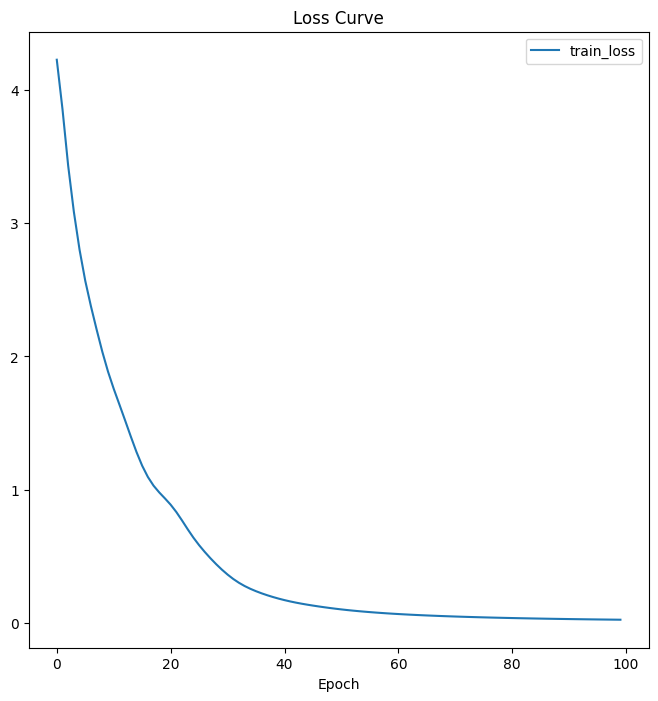

In [128]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,8))
plt.title("Loss Curve")
plt.plot(loss_logger, label='train_loss')
# plt.plot(val_loss, label='val_loss')
# plt.plot(accuracy_logger,label='accuracy')
plt.xlabel("Epoch")
plt.legend()
plt.show()

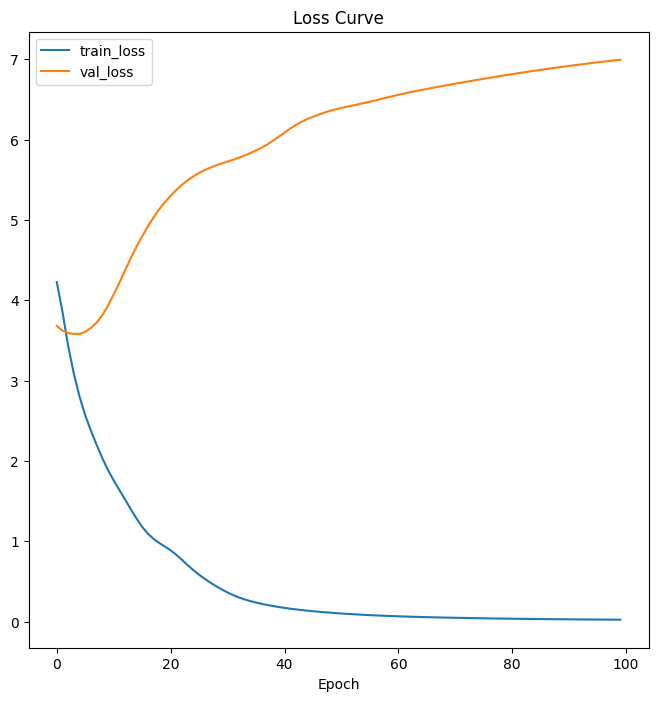

In [129]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,8))
plt.title("Loss Curve")
plt.plot(loss_logger, label='train_loss')
plt.plot(val_loss, label='val_loss')
# plt.plot(accuracy_logger,label='accuracy')
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [ ]:
def check_accuracy(loader, model):
    if loader == train_loader:
        print("Checking accuracy on training data")
    else:
        print("Checking accuracy on test data")  
          
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            # x = x.reshape(x.shape[0], -1)
            
            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
            
        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")
        
    model.train()

In [ ]:
check_accuracy(train_loader, model)
# h = torch.zeros(num_layers, 7, hidden_size).to(device)
# c = torch.zeros(num_layers, 7, hidden_size).to(device)
check_accuracy(test_loader, model)